<a href="https://colab.research.google.com/github/ayush9492/GenAi/blob/main/Text_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of words

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 1) Basic bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
texts = [
    "The cat sat on the mat",
    "The dog sat on the floor",
    "Cats and dogs are pets"
]

# Create and fit CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Get feature names (words)
print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Matrix:\n", X.toarray())

Vocabulary: ['and' 'are' 'cat' 'cats' 'dog' 'dogs' 'floor' 'mat' 'on' 'pets' 'sat'
 'the']
BoW Matrix:
 [[0 0 1 0 0 0 0 1 1 0 1 2]
 [0 0 0 0 1 0 1 0 1 0 1 2]
 [1 1 0 1 0 1 0 0 0 1 0 0]]


In [3]:
df = pd.DataFrame({"text":["The cat sat on the mat",
    "The dog sat on the floor",
    "Cats and dogs are pets"],"output":[1,0,1]})

from sklearn.feature_extraction.text import CountVectorizer

# Create and fit CountVectorizer
cv = CountVectorizer()

bow = cv.fit_transform(df['text'])
print("Vocabulary:",cv.vocabulary_)
bow.toarray()

Vocabulary: {'the': 11, 'cat': 2, 'sat': 10, 'on': 8, 'mat': 7, 'dog': 4, 'floor': 6, 'cats': 3, 'and': 0, 'dogs': 5, 'are': 1, 'pets': 9}


array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]])

In [4]:
cv.transform(["The cat dog sat on the mat"]).toarray()

array([[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2]])

In [5]:
x = bow.toarray()
y = df['output']

In [6]:
x

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]])

# N-Grams

In [7]:
# Basic n-grams types:

text = "The quick brown fox"

# Unigrams (n=1)
unigrams = ['The', 'quick', 'brown', 'fox']

# Bigrams (n=2)
bigrams = ['The quick', 'quick brown', 'brown fox']

# Trigrams (n=3)
trigrams = ['The quick brown', 'quick brown fox']

In [8]:
from nltk import ngrams
import nltk
nltk.download('punkt_tab')
text = "The quick brown fox jumps over the lazy dog"
tokens = nltk.word_tokenize(text)

# Generate different n-grams
unigrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Unigrams: [('The',), ('quick',), ('brown',), ('fox',), ('jumps',), ('over',), ('the',), ('lazy',), ('dog',)]
Bigrams: [('The', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'over'), ('over', 'the'), ('the', 'lazy'), ('lazy', 'dog')]
Trigrams: [('The', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]


# TF - IDF (Term Frequency Inverse Document Frequency)

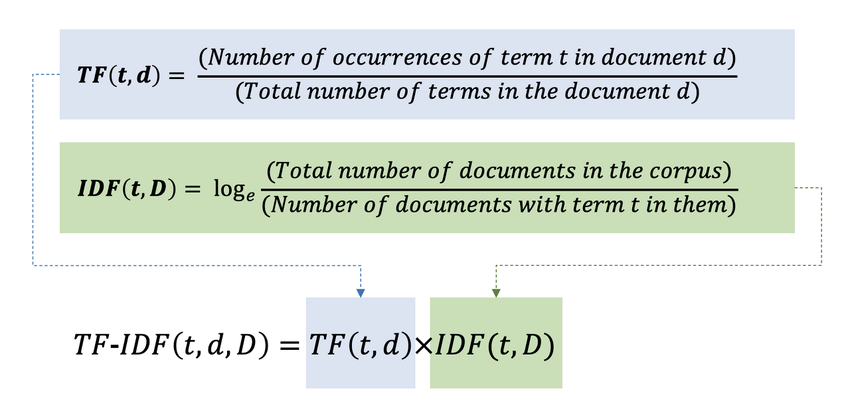

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "The cat sat on the mat",
    "The dog sat on the floor",
    "Cats and dogs are pets"
]

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()
tfidf_matrix

array([[0.        , 0.        , 0.42755362, 0.        , 0.        ,
        0.        , 0.        , 0.42755362, 0.32516555, 0.        ,
        0.32516555, 0.6503311 ],
       [0.        , 0.        , 0.        , 0.        , 0.42755362,
        0.        , 0.42755362, 0.        , 0.32516555, 0.        ,
        0.32516555, 0.6503311 ],
       [0.4472136 , 0.4472136 , 0.        , 0.4472136 , 0.        ,
        0.4472136 , 0.        , 0.        , 0.        , 0.4472136 ,
        0.        , 0.        ]])

In [10]:
# helps in removing sparse matrix dimensionality

# Word2Vec

[Word2vec explanation](https://medium.com/@fraidoonomarzai99/word2vec-cbow-skip-gram-in-depth-88d9cc340a50#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjVkMTJhYjc4MmNiNjA5NjI4NWY2OWU0OGFlYTk5MDc5YmI1OWNiODYiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMDYxNTEzMzg3MTA1NTM5MjYyODgiLCJlbWFpbCI6ImF5dXNoYmhhcmF0aXlhQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYmYiOjE3Mzk3NzI1NTYsIm5hbWUiOiJBeXVzaCBCaGFyYXRpeWEiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUNnOG9jSzNvYlRYbVJXYm85eEZBVHJpTnY4WUpZZVNPOGZaTHJwM0tycGxMb1dsVGsxNTBicWM9czk2LWMiLCJnaXZlbl9uYW1lIjoiQXl1c2giLCJmYW1pbHlfbmFtZSI6IkJoYXJhdGl5YSIsImlhdCI6MTczOTc3Mjg1NiwiZXhwIjoxNzM5Nzc2NDU2LCJqdGkiOiI1ODBhYWJlN2Q4OWEyZGQwZTlmOGQyYzBkMzVlMDczM2U1MTdjNGVkIn0.nXf28XVIQnAZSCCDjGs_PcJPKFDe5sCCVMXgjUo8enNWYpkKM6miwtXsUwtnxQrrTJxc4qw7NlATe1TKnxBjgbzMnff1A-Oh8ZU1O-_J5pxP_6qmO4X7KtLtHufyEA3q6TD5bzn-ahelhYGfQUOAjJ8vkU9nj8-aR4Ziz8twQX4_mOxOKo7GiqODOZZv55MQKS7gor3beJFAizOOpzvAj-daSzmEmfQZ-QZJZYrsWYulEpvOzV4V0cte93ahvQIvo3ChB1fOHkgWBtcURIxSk_72gYSq2RugQvZsAHpQKnZBgXvWbGGPnXpqmDDPrBSx5ibtC6KeQM5CUBHyCpkg-g)

In [11]:
import numpy as np
import pandas as pd
import gensim
import os

In [12]:
!pip install --upgrade gensim --user

In [13]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
story = []
for filename in os.listdir('/content/drive/MyDrive/genai'):
    if filename == '.ipynb_checkpoints':
      pass
    f = open(os.path.join('/content/drive/MyDrive/genai',filename))
    corpus = f.read()
    print(corpus)
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

A Game Of Thrones Book One of A Song of Ice and Fire By George R. R. Martin PROLOGUE "We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are dead." "Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. "Dead is dead," he said. "We have no business with the dead." "Are they dead?" Royce asked softly. "What proof have we?" "Will saw them," Gared said. "If he says they are dead, that's proof enough for me." Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather than sooner. "My mother told me that dead men sing no songs," he put in. "My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman's tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest. Page 1 "We have a long ride 

In [15]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',
